<p style="font-family: Arial; font-size:2.70em;color:purple; font-style:bold">
GPA over Successive Semester Visualization
</p>
<br>


Importing Necessarry Libraries <br>
Here, I am will use "Seaborn" and "plotly" to show visualization.
1. Seaborn **Point plot** visualization
2. Plotly **Connected scatter plot** visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('FDU_Data.csv', sep =",")
print(type(data))
print("Shape will show number of rows and columns in DataFrame (rows,columns):",data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
Shape will show number of rows and columns in DataFrame (rows,columns): (1262, 43)


,REC_ID,FILETERM,FTERMA,FILEDATE,COURSE,CRSLEVEL,CDEPT,CNUM,CTITLE,MINCREDS,...,SATVERB,SATMATH,SATWRITE,ACT,Wordcount,ZYBooks_Timeliness,ZYBooks_Curiosity,Weighted_Midterm_Total,Weighted_Final_Total,Word_Count
0,3878,201509,201509,9/1/2015,EGTM_2232,2,EGTM,2232,Mechanical Measurement/Devices,3,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
1,3878,201509,201509,9/1/2015,ENGR_1301,1,ENGR,1301,"Engr Pract, Graphics and Des",3,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
2,3878,201509,201509,9/1/2015,ENWR_1101,1,ENWR,1101,Academic Writing,3,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
3,3878,201509,201509,9/1/2015,MATH_1105,1,MATH,1105,College Algebra,4,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
4,3878,201602,201602,2/1/2016,EGTC_1223,1,EGTC,1223,Introduction to CAD,2,...,450,460,480,,,1500.0,700.0,68.6,90.25,296


In [3]:
data.columns

Index(['REC_ID', 'FILETERM', 'FTERMA', 'FILEDATE', 'COURSE', 'CRSLEVEL',
       'CDEPT', 'CNUM', 'CTITLE', 'MINCREDS', 'MaxCredits', 'Grade', 'UGGR',
       'FT_PT', 'REGCREDS', 'ADMSTAT', 'SPECSRV1', 'SPECSRV2', 'CATEGORY',
       'ACADEMICPROGRAM', 'ACADEMICPROGRAMDESCRIPTION', 'STARTTRM', 'SEX',
       'AGE', 'ALIEN', 'NEWETH', 'COMBETH', 'CLASS', 'CUMATT', 'CUMCRED',
       'CUMGPA', 'CUMPTS', 'HSNAME', 'SATVERB', 'SATMATH', 'SATWRITE', 'ACT',
       'Wordcount', 'ZYBooks_Timeliness', 'ZYBooks_Curiosity',
       'Weighted_Midterm_Total', 'Weighted_Final_Total', 'Word_Count'],
      dtype='object')

## What do we need?

1. Each student. (REC_ID)
2. GPA (CUM_GPA)
3. Term (FILE_TERM)

In [4]:
df = data[['REC_ID','FILETERM','CUMGPA']]

In [5]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,201509,0
1,3878,201509,0
2,3878,201509,0
3,3878,201509,0
4,3878,201602,2.639


In [6]:
df.shape[0]

1262

## Data cleaning process

In [7]:
df.isnull().any()

REC_ID      False
FILETERM    False
CUMGPA      False
dtype: bool

In [8]:
df['CUMGPA'].str.contains(' ').any()

True

In [9]:
df['CUMGPA'].replace(' ', np.nan, inplace = True)

C:\Users\Hemang\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [10]:
df.isnull().any()

REC_ID      False
FILETERM    False
CUMGPA       True
dtype: bool

In [11]:
df = df.dropna()

In [12]:
df.shape[0]

1256

## Duplicate removing:

<b>We have duplicate data which we can not use to plot the graph. So, we have to remove the duplicate data.</b>

In [13]:
df.duplicated().any()

True

In [14]:
df = df.drop_duplicates()

In [15]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,201509,0
4,3878,201602,2.639
10,3878,201609,3.061
16,3878,201702,3.107
20,5213,201509,0


In [16]:
df.shape[0]

223

## Plotting point plot using seaborn :

<p>Notice here, we convert the data type of CUMGPA column to plot the data on graph. </p>

In [17]:
df.dtypes

REC_ID       int64
FILETERM     int64
CUMGPA      object
dtype: object

In [18]:
df['CUMGPA'] = df['CUMGPA'].astype(float)

In [19]:
df.dtypes

REC_ID        int64
FILETERM      int64
CUMGPA      float64
dtype: object

### Filtering terms : Getting data after Year 2014

In [20]:
filter_terms = df['FILETERM'] >= 201509

In [21]:
df = df[filter_terms]

In [22]:
df.shape

(207, 3)

In [23]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,201509,0.000
4,3878,201602,2.639
10,3878,201609,3.061
16,3878,201702,3.107
20,5213,201509,0.000


In [24]:
terms = {201302:'Spring 2013',201309:'Fall 2013',201402:'Spring 2014',201409:'Fall 2014',201502:'Spring 2015',
         201509:'Fall 2015',201602:'Spring 2016',201609:'Fall 2016',201702:'Spring 2017',201709:'Fall 2017'}

In [25]:
df['FILETERM'] = df['FILETERM'].replace(terms)

# Pandas 0.15 introduced Categorical Series, which allows a much clearer way to Custom Sort the column (Sort the way we want) :

**First make the "FILETERM" column a categorical and specify the ordering to use.**

In [26]:
df['FILETERM'] = pd.Categorical( df['FILETERM'],['Spring 2015','Fall 2015','Spring 2016','Fall 2016','Spring 2017'])

### After making it categorical. If you check the data frame. It is still not sorted.

In [27]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,Fall 2015,0.000
4,3878,Spring 2016,2.639
10,3878,Fall 2016,3.061
16,3878,Spring 2017,3.107
20,5213,Fall 2015,0.000


### But When you call the sort method explicitly then it will do the Categorical Sort. 

In [28]:
df = df.sort_values(by =['FILETERM'])

In [29]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,Fall 2015,0.00
282,13281,Fall 2015,2.41
217,12854,Fall 2015,0.00
307,14691,Fall 2015,2.00
330,14916,Fall 2015,0.00


<b>Seaborn plotting:</b>
1. hue = "REC_ID" will separte the data points by record id which is unique to each student. It will color data for each student differently.
2. dodge = True will separate the overlapping data points. For example, if 2 students have same GPA in same TERM then that overlapping will be separated. **But we won't use dodge over here.**


In [30]:
sns.set_style("darkgrid")

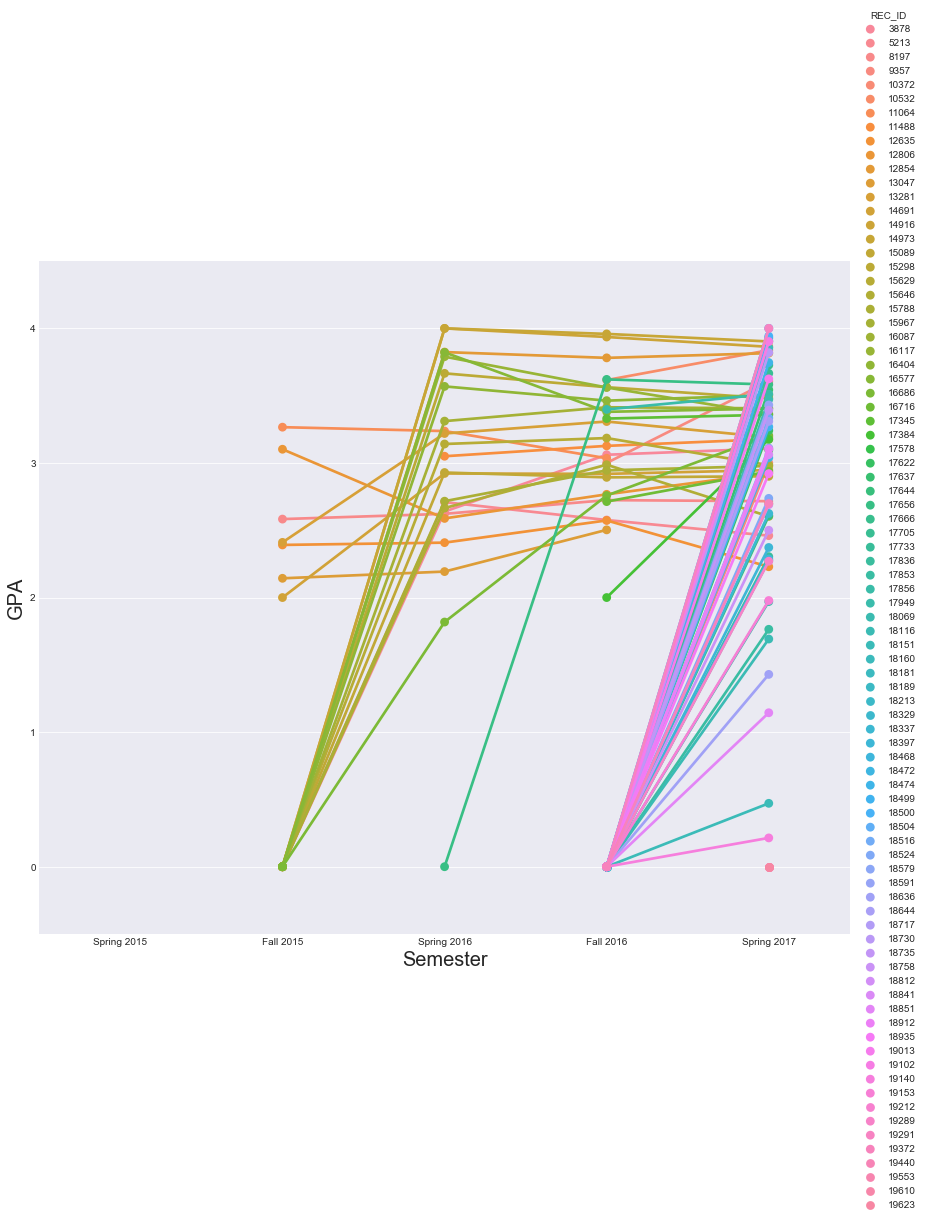

In [31]:
ax = sns.factorplot(x = 'FILETERM', y = 'CUMGPA', hue = 'REC_ID', data = df, legend_out = True ,size= 10, aspect = 1.2)

plt.xlabel("Semester", fontsize=20)
plt.ylabel("GPA", fontsize=20)
plt.ylim(-0.5,4.5)
plt.show()

## Plotly plotting:

<p style="color:red">The Seaborn plots are way more easy to create and manipulate then Matplotlib. However, It does not provides interactive interface like Plotly. Plotly has capability to provide an interactive way to communicate with figure.</p>
<p style="font-size: 20px;">How plotly is interactive?</p>

1. **Hover Modes:** You can change on hover event on the graph itself. See the second from last and third from last option in final diagram on top right side of corner. 
    
2. **Isolate Trace:** It is possible to just view the trace we want. Move the cursor arrow on graph legend and you will notice that legends are clickable. So, DOUBLE-CLICK on any one trace and you will get that only trace. Other traces will be disappeared. Also, if you CLICK ONE TIME (i.e SINGLE CLICK), It will remove that particular trace. So, you can compare the data traces. 
    
<br>

In [32]:
from IPython.display import display, HTML
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [33]:
figure = {
    'data': [],
    'layout':{},
}

#### It is okay to not give x-axis value. As we are setting it while iterating over each student (REC_ID).

In [34]:
figure['layout']['xaxis'] = {'x':['Fall 2014','Spring 2014','Fall 2015','Spring 2015','Fall 2016','Spring 2016',
                                                'Fall 2017','Spring 2017'],'title': 'File Term'}
figure['layout']['yaxis'] = {'range':[-0.5,4.5],'autorange': False,'title': 'GPA'}
figure['layout']['hovermode'] = 'closest'

In [35]:
records = df['REC_ID'].unique().tolist()

In [36]:
len(records)

85

In [37]:
for student in records:
    
    dataset_per_student = df[df['REC_ID'] == student] # Extracting data for each student. 

    trace = go.Scatter({
        'x': list(dataset_per_student['FILETERM']),
        'y': list(dataset_per_student['CUMGPA']),
        'connectgaps': True,
        'text': list(dataset_per_student['CUMGPA']),
        'name': student
    })
      
    figure['data'].append(trace)

In [39]:
iplot(figure, validate = False)